In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/Estatisticas-Python-frequencias-medidas/refs/heads/main/dados/vendas_ecommerce.csv'
df = pd.read_csv(url)
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5


In [4]:
df.shape # retorna a qntdd de linhas e colunas

(200000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id_compra          200000 non-null  object 
 1   sexo_biologico     200000 non-null  object 
 2   idade_cliente      200000 non-null  int64  
 3   regiao_cliente     200000 non-null  object 
 4   categoria_produto  200000 non-null  object 
 5   preco_unitario     200000 non-null  float64
 6   quantidade         200000 non-null  int64  
 7   total_compra       200000 non-null  float64
 8   tempo_entrega      200000 non-null  int64  
 9   avaliacao          200000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 15.3+ MB


# Tipos de Variáveis
- **Qualitativas (Categóricas):** variáveis que representam características ou categorias. Geralmente usadas para classificar ou categorizar dados. Ex: sexo biologico e região.
  - **Nominais**: quando não possuem uma ordem natural. Ex: tipo de produto
  - **Ordinais**: possuem uma ordem ou hierarquia. Ex: níveis de escolaridade.
- **Quantitativas (Numéricas):** variáveis que representam números e podem ser mensuradas. Estas variáveis têm significado matemático e podem ser usadas para cálculos. Ex: idade e total de compras.
  - **Discretas**: valores inteiros e contáveis. Ex: quantidade de produtos.
  - **Contínuas**: qualquer valor em um intervalo. Ex: altura de pessoas.

In [7]:
#analise da variavel qualitativa nominal: quantidade de vendas por categoria
df['categoria_produto'].unique()

array(['Ferramentas e Construção', 'Alimentos e Bebidas', 'Eletrônicos',
       'Papelaria e Escritório', 'Beleza e Cuidados Pessoais',
       'Casa e Mobílias', 'Roupas, Calçados e Acessórios', 'Livros',
       'Brinquedos', 'Esporte e Lazer'], dtype=object)

In [14]:
produtos = df['categoria_produto'].value_counts().reset_index() # o value_counts cria uma series, então se usa o reset_index() para transforma-lo em um dataframe
produtos

,categoria_produto,count
0,Eletrônicos,36060
1,"Roupas, Calçados e Acessórios",27917
2,Casa e Mobílias,26015
3,Beleza e Cuidados Pessoais,22026
4,Esporte e Lazer,19939
5,Alimentos e Bebidas,18022
6,Papelaria e Escritório,13936
7,Livros,13790
8,Ferramentas e Construção,12063
9,Brinquedos,10232


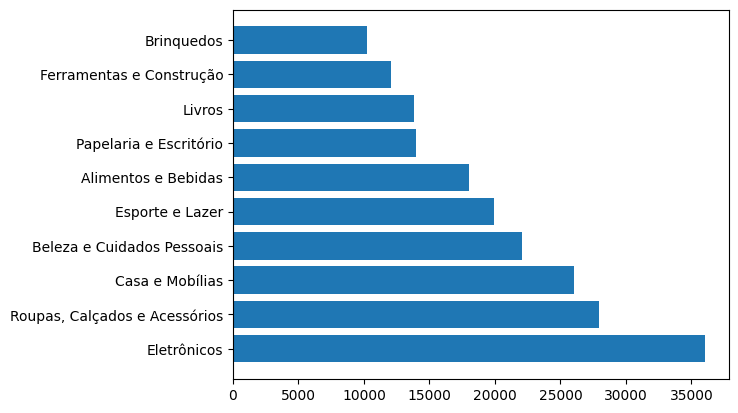

In [16]:
import matplotlib.pyplot as plt
plt.barh(produtos['categoria_produto'], produtos['count'])
plt.show()

In [17]:
#analise de variavel qualitativa ordinal: avaliacao
df['avaliacao'].unique()

array([1, 4, 5, 3, 2])

In [19]:
sorted(df['avaliacao'].unique())

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]

In [21]:
df['avaliacao indicador'] = pd.Categorical( #transforma uma coluna em um tipo categórico
    df['avaliacao'], #indica que os dados que serão categorizados vem da coluna 'avaliacao'
    categories = [1, 2, 3, 4, 5], #define quais são as categorias possiveis para a nova coluna
    ordered = True # indica que as categorias tem uma ordem especifica.
)

In [22]:
avaliacao_labels = {1: 'Péssimo', 2: 'Ruim', 3: 'Regular', 4: 'Bom', 5: 'Ótimo'}
df['avaliacao indicador'] = df['avaliacao indicador'].map(avaliacao_labels)


In [23]:
df.head()

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
0,9f86e969-221a-4b1a-9b48-9aba719b61cf,Masculino,33,Sul,Ferramentas e Construção,96.80,2,193.60,18,1,Péssimo
1,659f9b07-be10-4849-b2ab-dd542498a1e8,Feminino,33,Nordeste,Alimentos e Bebidas,247.68,1,247.68,6,4,Bom
2,d317d7df-1126-42e5-bf4b-0e178bd4e14e,Feminino,36,Sudeste,Eletrônicos,627.46,2,1254.92,8,5,Ótimo
3,bb99bcf6-b333-493e-9ec2-c39f8695503c,Feminino,21,Sul,Eletrônicos,2025.07,8,16200.56,6,5,Ótimo
4,898e4624-84e9-4c41-b181-66d3b7ccfef7,Masculino,31,Centro-Oeste,Papelaria e Escritório,99.24,5,496.20,13,5,Ótimo


In [24]:
df_unico = df[['avaliacao', 'avaliacao indicador']].drop_duplicates()
df_unico

,avaliacao,avaliacao indicador
0,1,Péssimo
1,4,Bom
2,5,Ótimo
8,3,Regular
14,2,Ruim


In [25]:
#analisando variavel discreta
df['quantidade'].unique()

array([ 2,  1,  8,  5,  3,  7,  6,  4, 10,  9])

In [26]:
print(f"Vendemos de {min(df['quantidade'])} até {max(df['quantidade'])} unidades de produto por registro")

Vendemos de 1 até 10 unidades de produto por registro


In [27]:
#analisando variavel contínua
df['total_compra'].unique()

array([  193.6 ,   247.68,  1254.92, ..., 13183.8 ,  1666.33,  1193.03])

In [28]:
print(f"Tivemos vendas a partir de R$ {min(df['total_compra']):,.2f} até R$ {max(df['total_compra']):,.2f}")

Tivemos vendas a partir de R$ 5.05 até R$ 20,744.70


In [29]:
df.sort_values(by = 'total_compra')

,id_compra,sexo_biologico,idade_cliente,regiao_cliente,categoria_produto,preco_unitario,quantidade,total_compra,tempo_entrega,avaliacao,avaliacao indicador
157075,b866504d-9fe1-4c75-8956-decf7f25dd75,Masculino,35,Sudeste,Papelaria e Escritório,5.05,1,5.05,13,4,Bom
4562,5a66b58a-2ab0-49c3-b597-f45846130ded,Feminino,37,Norte,Papelaria e Escritório,5.14,1,5.14,11,2,Ruim
6279,c67e996c-403c-4f58-81c5-996c1ab676a5,Masculino,34,Sul,Papelaria e Escritório,5.28,1,5.28,7,3,Regular
50155,e7ad75b4-6a0e-4609-801c-ef12adeb837a,Masculino,55,Sudeste,Papelaria e Escritório,5.35,1,5.35,11,5,Ótimo
85703,ed88c6a2-2fdd-4278-bfa8-fd54f7e2f357,Feminino,42,Centro-Oeste,Papelaria e Escritório,5.78,1,5.78,16,4,Bom
...,...,...,...,...,...,...,...,...,...,...,...
88073,5f125e88-f01c-4499-9a25-c4910bc76dee,Masculino,39,Nordeste,Eletrônicos,2037.44,10,20374.40,7,2,Ruim
134287,2c3853dc-b9dc-400a-bd70-ff2521fe4d8a,Feminino,35,Sul,Eletrônicos,2057.76,10,20577.60,6,2,Ruim
17790,dbf2429a-3252-42df-ad4e-a11339afceb8,Feminino,33,Sudeste,Eletrônicos,2058.18,10,20581.80,4,5,Ótimo
114561,dc3c4162-5772-480e-b7fa-0ccc41d78a40,Feminino,29,Sudeste,Eletrônicos,2058.77,10,20587.70,6,5,Ótimo
